# **Global Terrorism**

**My analysis is based on the Global Terrorist Attacks between 1970 and 2017. I have made statistical analyses and visualized data to draw valuable insights. I have analyzed the world data, followed by narrowing my focus on India. I have analyzed data according to the year, country, city, attack type, target type, attack group, etc., to explore the data's specifications and make necessary inferences. I have used Visualisation tools like Seaborn, Matplotlib, Folium. I have used the Flask web framework for the web frontend. Below are my statistical plots with the analysis!**

### **Reading the csv file**

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('globalterrorismdb_071dist.csv',encoding = "ISO-8859-1")
data.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  1.970000e+11   1970       7     2  ...        0         0       0      NaN
1  1.970000e+11   1970       0     0  ...        1         1       1      NaN
2  1.970010e+11   1970       1     0  ...       -9         1       1      NaN
3  1.970010e+11   1970       1     0  ...       -9         1       1      NaN
4  1.970010e+11   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

### **Total Number of Countries**

In [ ]:
data.country_txt.nunique()

205

In [ ]:
data.shape

(181691, 135)

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','Attack_Type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['Casualities']=data['Killed']+data['Wounded']
data=data.copy()
data.tail(1)

Year  Month  Day  ... Weapon_type Motive Casualities
181690  2017     12   31  ...  Explosives    NaN         0.0

[1 rows x 18 columns]

In [ ]:
data.describe()

Year          Month  ...        Wounded    Casualities
count  181691.000000  181691.000000  ...  165380.000000  164817.000000
mean     2002.638997       6.467277  ...       3.167668       5.296128
std        13.259430       3.388303  ...      35.949392      42.069023
min      1970.000000       0.000000  ...       0.000000       0.000000
25%      1991.000000       4.000000  ...       0.000000       0.000000
50%      2009.000000       6.000000  ...       0.000000       1.000000
75%      2014.000000       9.000000  ...       2.000000       4.000000
max      2017.000000      12.000000  ...    8191.000000    9574.000000

[8 rows x 8 columns]

## **Mean of the Killed People**

In [ ]:
data.Killed.mean()

2.4032722986614385

In [ ]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
Attack_Type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [ ]:
data.drop(['Summary','Motive'],axis=1)
data.head(2)

Year  Month  Day  ... Weapon_type Motive Casualities
0  1970      7    2  ...     Unknown    NaN         1.0
1  1970      0    0  ...     Unknown    NaN         0.0

[2 rows x 18 columns]

In [ ]:
data.Year.nunique()

47

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
attack=data['Country'].value_counts()[:40].reset_index()
attack.columns=['Country','Total Attacks']
attack.head(2)

Country  Total Attacks
0      Iraq          24636
1  Pakistan          14368

### **Here is the graph which shows us the total number of attacks in each counrty. Iraq vitnessed the max no of attacks closingly followd by India.**

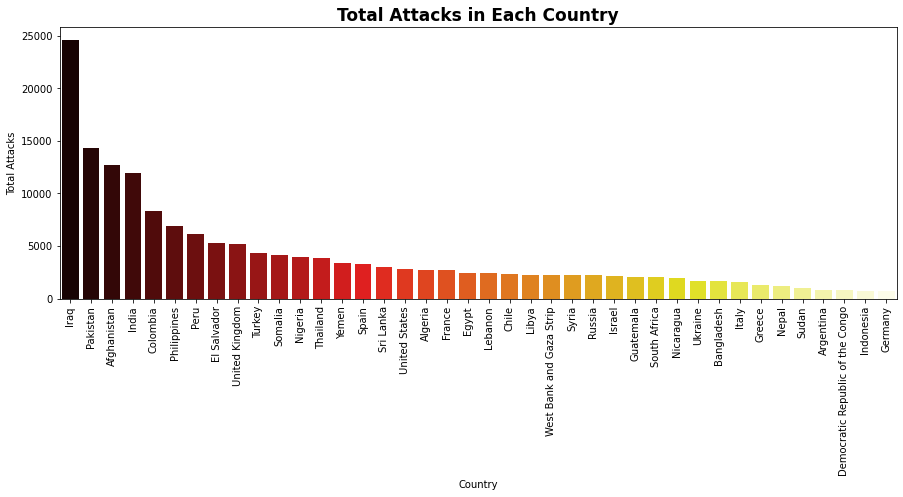

In [ ]:
plt.subplots(figsize=(15,5))
sns.barplot(x=attack.Country,y=attack['Total Attacks'],palette='hot')
plt.xticks(rotation=90)
plt.title('Total Attacks in Each Country',fontdict={'fontsize':17,'fontweight':'bold'})
plt.show()

In [ ]:
casu=data.groupby('Country').Casualities.count().reset_index().sort_values('Casualities', ascending=False)[:40]
casu.head(2)

Country  Casualities
84       Iraq        23306
134  Pakistan        13871

## **Below is the plot of the Total number of casualities in each country.Iraq again vitnessing highest number of casualities and india following it shortly. Total number of Casualities are proportional to the total number of attacks vitnessed by the country.**

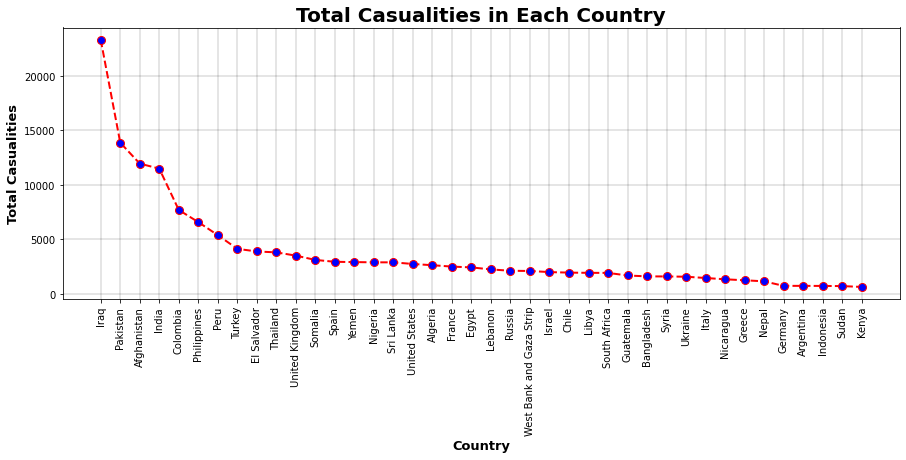

In [ ]:
plt.subplots(figsize=(15,5))
plt.plot(casu.Country,casu.Casualities,linestyle='dashed',linewidth = 2, color='red', marker="o",markerfacecolor='blue', markersize=8)
plt.xticks(rotation=90)
plt.title('Total Casualities in Each Country',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('Country',fontdict={'fontsize':13,'fontweight':"bold"})
plt.ylabel("Total Casualities",fontdict={'fontsize':13,'fontweight':"bold"})
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.show()

## **Below is the distribution of the number of terrorist activities every year.Ther is an significant increase in the terrorist activities in the recent years between 2012 to 2017 with the peak evident in 2014**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


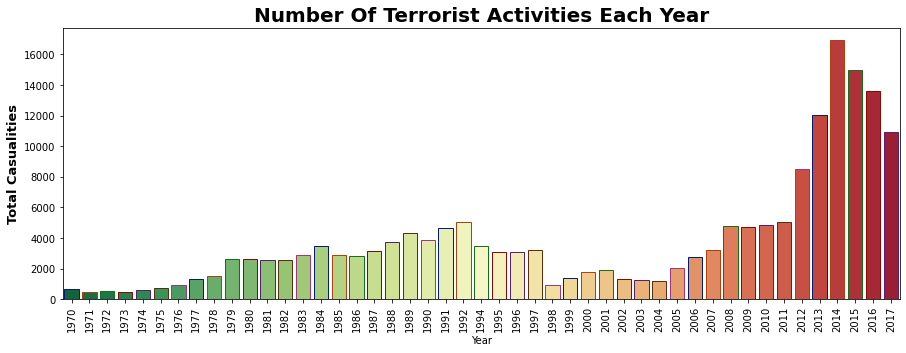

In [ ]:
plt.subplots(figsize=(15,5))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year',fontdict={'fontsize':20,'fontweight':"bold"})
plt.ylabel("Total Casualities",fontdict={'fontsize':13,'fontweight':"bold"})
plt.show()

In [ ]:
data.Year.nunique()

47

In [ ]:
n=data.groupby(data['Attack_Type']).Casualities.count().reset_index()
n.columns=['Attack_Type','Casualities']
n=n.head(8)

## **Below is the Circular Statistical plot of the percentage of the Attack Type which was responsible for the casualities. Bombing / Explosion Armed and Armed Assault are seen to be the cause of 76% of the casualities in these attacks.**

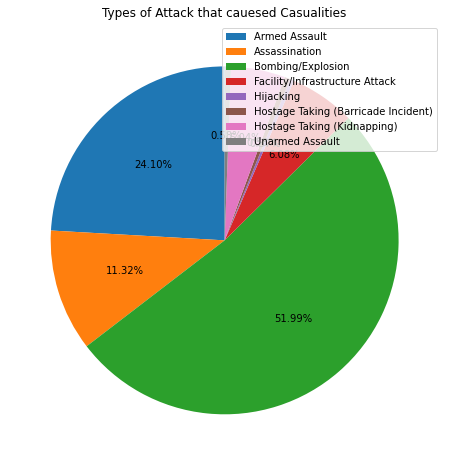

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
ax.pie(n.Casualities,autopct='%.2f%%', startangle=90)
ax.set_title("Types of Attack that cauesed Casualities");
ax.legend(labels=n.Attack_Type,loc='upper right')

# **Analysis of India**

In [ ]:
data.Year.nunique()

47

In [ ]:
india_df=data[data.Country=='India']
india_df.Year.nunique()

42

In [ ]:
india_df.Year.nunique()

42

In [ ]:
city_attacks = india_df.city.value_counts().to_frame().reset_index()
city_attacks.columns = ['City', 'Total Attacks']
city_cas = india_df.groupby('city').Casualities.count().to_frame().reset_index()
city_cas.columns = ['City', 'Casualities']
city_tot = pd.merge(city_attacks, city_cas, how='left', on='City').sort_values('Total Attacks', ascending=False)[:21]

# **Below is the comparision of the total number of attacks and total number of casualities in India.The total number of Casualities are proportional to the total number of attacks vitnessed by cities in India.**

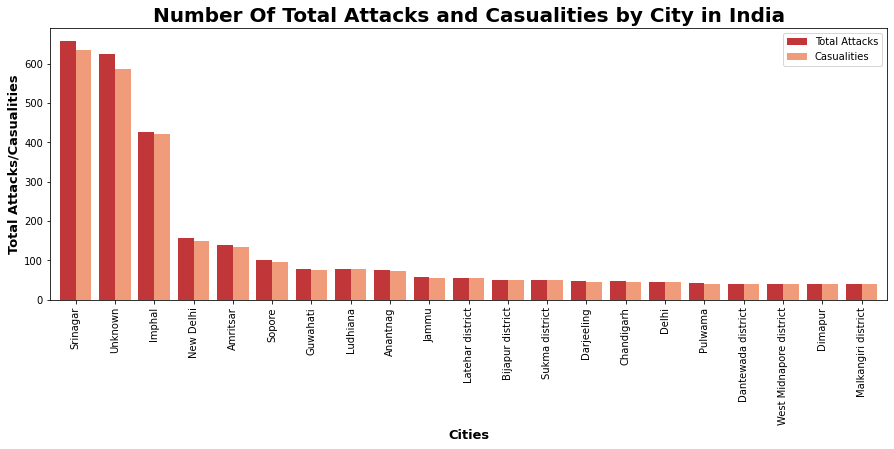

In [ ]:
sns.set_palette('RdBu')
city_tot.plot.bar(x='City', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualities by City in India')
plt.xlabel('Cities',fontdict={'fontsize':13,'fontweight':'bold'})
plt.ylabel('Total Attacks/Casualities',fontdict={'fontsize':13,'fontweight':'bold'})
plt.title('Number Of Total Attacks and Casualities by City in India',fontdict={'fontsize':20,'fontweight':'bold'})
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()

In [ ]:
ind=india_df.groupby('Year').count().reset_index()
ind.head(2)


Year  Month  Day  Country  ...  Target_type  Weapon_type  Motive  Casualities
0  1972      1    1        1  ...            1            1       0            1
1  1975      1    1        1  ...            1            1       1            1

[2 rows x 18 columns]

## **Below is the distribution of total number of casualties over the year.Total number of attacks is evident in 2016.The number of casualities have incresed significantly in recent years.**

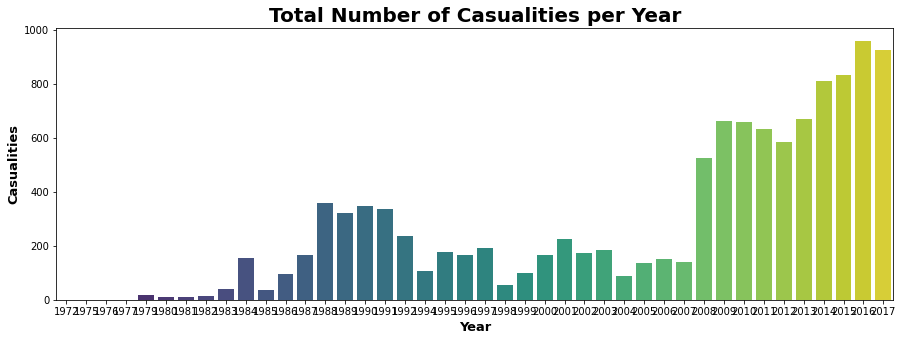

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=ind['Year'],y=ind['Casualities'],palette='viridis')
plt.title('Total Number of Casualities per Year',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('Year',fontdict={'fontsize':13,'fontweight':'bold'})
plt.ylabel('Casualities',fontdict={'fontsize':13,'fontweight':'bold'})
plt.show()

## **Below is the heatmap showing the magnitude of the total casualities of a particular year and city in India. Intensivity of casualities were maximum in 1991 in India.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Casualities for a particular Year & City')

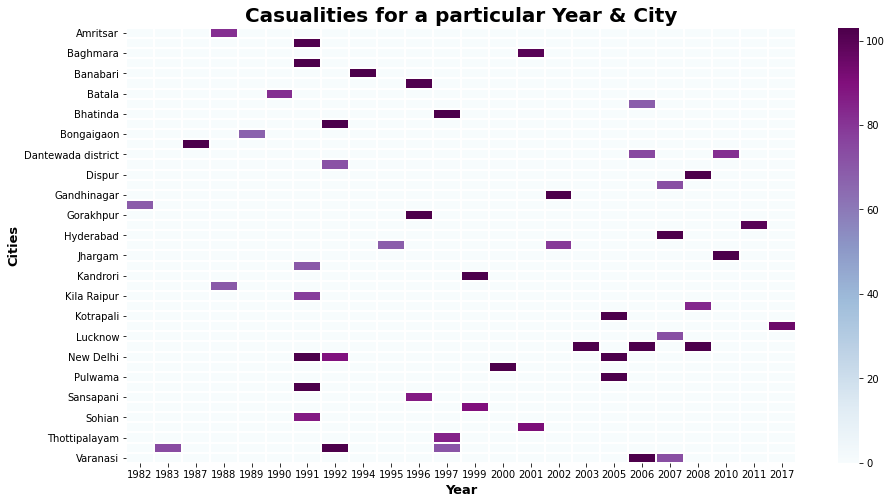

In [ ]:
india_df['Casualities'] = india_df['Casualities'].fillna(0).astype(int)
india_df = india_df.sort_values(by='Casualities',ascending=False)[:60]
heat=india_df.pivot_table(index='city',columns='Year',values='Casualities')
plt.figure(figsize=(15,8))
heat.fillna(0,inplace=True)
sns.heatmap(heat,robust = True,linewidths=1,cmap='BuPu')
plt.xlabel('Year',fontdict={'fontsize':13,'fontweight':'bold'})
plt.ylabel('Cities',fontdict={'fontsize':13,'fontweight':'bold'})
plt.title('Casualities for a particular Year & City',fontdict={'fontsize':20,'fontweight':'bold'})

# **Below is the statistical plot of the number of casualties in india every year. There is maximum of casualties in 1991 as there were maximum number of attacks in that year**

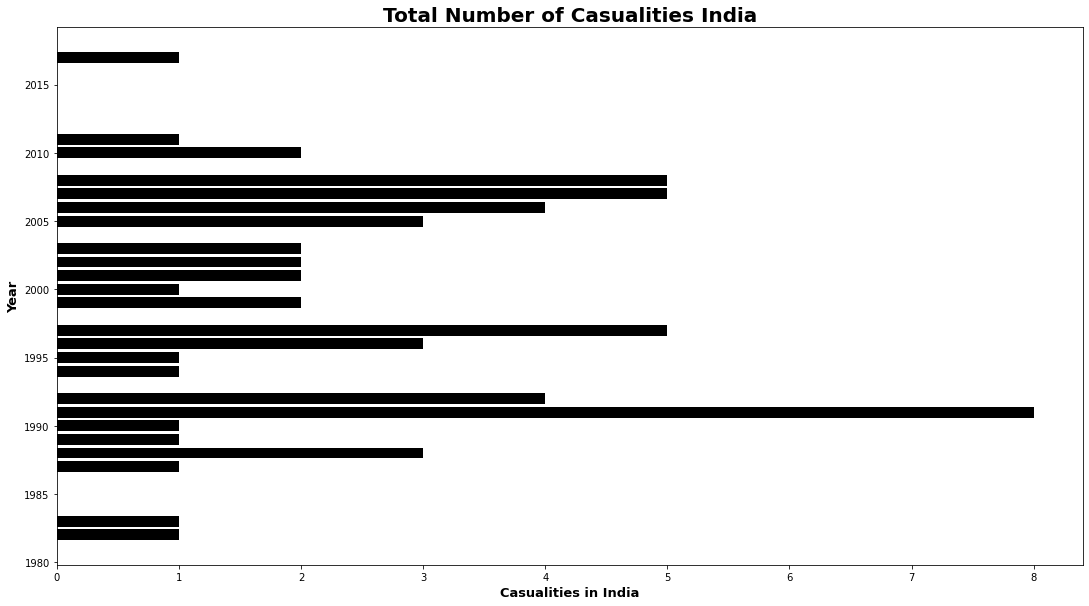

In [ ]:
ind=india_df.groupby('Year').count().reset_index()
plt.figure(figsize=(15,8))
plt.barh(ind.Year.unique(),ind['Casualities'],color='black')
plt.tight_layout()
plt.xlabel('Casualities in India',fontdict={'fontsize':13,'fontweight':'bold'})
plt.ylabel('Year',fontdict={'fontsize':13,'fontweight':'bold'})
plt.title('Total Number of Casualities India',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [ ]:
ind_state=india_df.groupby('city').count().reset_index()
ind_state.head()

city  Year  Month  Day  ...  Target_type  Weapon_type  Motive  Casualities
0  Amritsar     2      2    2  ...            2            2       0            2
1  Baddowal     1      1    1  ...            1            1       0            1
2  Baghmara     1      1    1  ...            1            1       1            1
3    Bajpur     1      1    1  ...            1            1       0            1
4  Banabari     1      1    1  ...            1            1       0            1

[5 rows x 18 columns]

# **Below is the Map showing the intensity of the terrorist attack at different locations across the world in 1991. Highest number of cases were observed in south-east part of North America.**

In [ ]:
import folium
from folium.plugins import MarkerCluster 
filyr = data.Year == 1991

fildata = data[filyr]
reqFildata = fildata.loc[:,'city':'longitude'] #We are getting the required fields
reqFildata = reqFildata.dropna() # drop NaN values in latitude and longitude
reqList = reqFildata.values.tolist()
# reqFilterDataLi

mp = folium.Map(location = [0, 15], tiles='CartoDB positron', zoom_start=5)
markerCluster = folium.plugins.MarkerCluster().add_to(mp)
for point in range(0, len(reqList)):
    folium.Marker(location=[reqList[point][1],reqList[point][2]],popup = reqList[point][0]).add_to(markerCluster)
mp